# 获取比特币价格

In [16]:
########## GEMINI 行情接口 ##########
## https://api.gemini.com/v1/pubticker/:symbol

import json
import requests

gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol)).json()
print(json.dumps(btc_data, indent=4))


{
    "last": "11475.56",
    "ask": "11485.73",
    "volume": {
        "USD": "9766327.453944814100000000000000000095",
        "BTC": "860.7948622637",
        "timestamp": 1565575200000
    },
    "bid": "11484.25"
}


              CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice  \
0   2019-07-01 06:00:00   11067.69   11127.66  10884.35    11006.21   
1   2019-07-01 08:00:00   10998.53   11058.68  10786.39    10893.06   
2   2019-07-01 10:00:00   10900.16   11131.67  10875.01    11033.22   
3   2019-07-01 12:00:00   11052.23   11070.03  10820.00    10973.17   
4   2019-07-01 14:00:00   10950.00   10962.91  10471.54    10544.50   
5   2019-07-01 16:00:00   10537.19   10603.06   9960.00    10344.31   
6   2019-07-01 18:00:00   10348.10   10422.46  10140.57    10251.60   
7   2019-07-01 20:00:00   10251.60   10322.69   9982.36    10206.06   
8   2019-07-01 22:00:00   10192.63   10590.00  10192.63    10539.10   
9   2019-07-02 00:00:00   10539.10   10552.68  10420.26    10451.10   
10  2019-07-02 08:00:00   10447.94   10456.03   9756.95     9830.00   
11  2019-07-02 10:00:00    9830.01   10301.24   9790.14    10144.43   
12  2019-07-02 12:00:00   10160.02   10235.35   9653.00     9948.18   
13  20

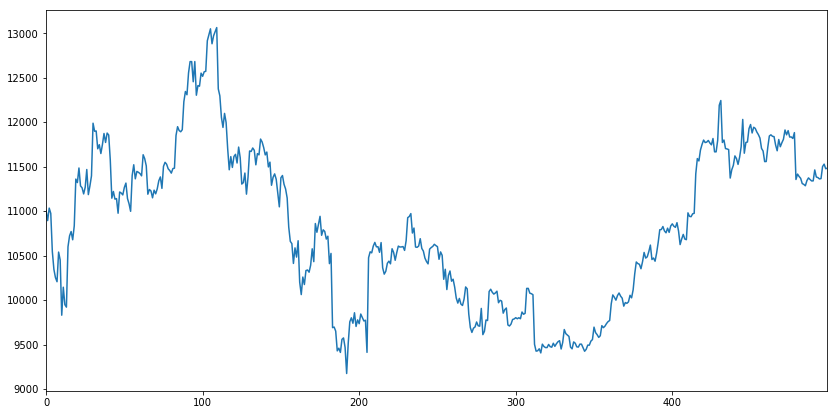

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time, datetime
%matplotlib inline
# 选择要获取的数据时间段
periods = '7200'

# 通过 Http 抓取 btc 历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', 
  params={
    'periods': periods
  })
data = resp.json()
# 转换成 pandas data frame
df = pd.DataFrame(
  data['result'][periods], 
  columns=[
    'CloseTime',
    'OpenPrice',
    'HighPrice',
    'LowPrice',
    'ClosePrice',
    'Volume',
    'NA'])
df.CloseTime = df.CloseTime.apply(datetime.datetime.utcfromtimestamp)
# 输出 DataFrame 的头部几行
print(df.head(130))
print(df.info())

# 绘制 btc 价格曲线
df['ClosePrice'].plot(figsize=(14, 7))